In [3]:
import pandas as pd
import numpy as np
import scorecardpy as sc
from Function.bin import *
from Function.model import *
from Function.clean import *
from Function.parameters import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from time import time
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 

In [38]:
warnings.filterwarnings('ignore')

## 数据说明

+ 此数据为海外某消费金融公司的某个人消费类贷款产品数据,客群大多拥有信用记录,要求在贷款准入节点构建评分卡评估客群信用风险,为贷中审批,授信定价提供参考。

+ 原始数据包括客户的申请信息,外部数据,征信信息,历史申请信息(若有),历史贷款表现(若有)五类信息,分散于不同的表中,这里已经进行了特征构建与宽表构建

+ 原始数据共20万样本,5000多个特征,这里为简化选择原数据中的122个特征与随机3万的样本演示

+ 特征含义见下:


```
1.申请及外部数据字段
 ID':订单编号
 TARGET:目标变量
 GENDER':性别(F,M)
 Age:年龄
 FLAG_OWN_CAR:是否有车
 OWN_CAR_AGE:拥有车时长
 HOUSING_TYPE:住房类型
 FLAG_OWN_REALTY:是否有房产
 NUM_CHILDREN':子女个数
 EDULEVEL:教育水平
 MARRIAGE':婚姻状况
 DAYS_EMPLOYED:工作时长天
 DAYS_LAST_PHONE_CHANGE':以往申请记录中联系方式变更距今时长天
 DAYS_ID_PUBLISH:以往申请记录中变更申请的身份材料时长天
 CITY_RATING:居住城市综合水平评级
 score1:外部信用评分1
 score2:外部信用评分2
 score3:外部信用评分3
2.征信记录
 Bureau_Var102:近18月最大授信金额_在贷
 Bureau_Var1033:最大授信使用率_所有
 Bureau_Var1036:近24月最大授信使用率_所有
 Bureau_Var1044:近24月平均授信使用率_所有
 Bureau_Var1048:近24月平均授信使用率_在贷
 Bureau_Var1060:近24月平均授信使用率_所有_信用卡
 Bureau_Var1061:平均授信使用率_在贷_信用卡
 Bureau_Var1068:近24月最大授信使用率_所有_贷款
 Bureau_Var1069:最大授信使用率_在贷_贷款
 Bureau_Var1072:近24月最大授信使用率_在贷_贷款
 Bureau_Var1075:近12月平均授信使用率_所有_贷款
 Bureau_Var1089:平均授信使用率_所有_消费金融
 Bureau_Var109:近15月平均授信金额_所有
 Bureau_Var1096:近24月平均授信使用率_在贷_消费金融
 Bureau_Var1098:180天以内贷款笔数_所有
 Bureau_Var112:平均授信金额_所有
 Bureau_Var1120:征信到期日前360天贷款笔数_在贷_贷款
 Bureau_Var1123:征信到期日前270天贷款笔数_所有_消费金融
 Bureau_Var1129:已结清征信90天贷款笔数_所有
 Bureau_Var1132:已结清征信360天贷款笔数_所有
 Bureau_Var1149:已结清征信90天贷款笔数_在贷_贷款
 Bureau_Var1152:已结清征信360天贷款笔数_在贷_贷款
 Bureau_Var1153:已结清征信90天贷款笔数_所有_消费金融
 Bureau_Var1157:已结清征信90天贷款笔数_在贷_消费金融
 Bureau_Var1159:已结清征信270天贷款笔数_在贷_消费金融
 Bureau_Var116:近1年平均授信金额_在贷
 Bureau_Var1160:已结清征信360天贷款笔数_在贷_消费金融
 Bureau_Var117:近15月平均授信金额_在贷
 Bureau_Var120:平均授信金额_在贷
 Bureau_Var124:近1年授信金额标准差_所有
 Bureau_Var128:授信金额标准差_所有
 Bureau_Var136:平均授信金额标准差_在贷
 Bureau_Var140:近1年最大负债_所有
 Bureau_Var141:近15月最大负债_所有
 Bureau_Var142:近18月最大负债_所有
 Bureau_Var150:近18月最大负债_在贷
 Bureau_Var156:近1年总负债_所有
 Bureau_Var159:近2年总负债_所有
 Bureau_Var19:近6月客户贷款数_在贷
 Bureau_Var21:近15月客户贷款数_在贷
 Bureau_Var22:近18月客户贷款数_在贷
 Bureau_Var24:客户贷款数_在贷
 Bureau_Var248:最大历史逾期金额_所有_信用卡
 Bureau_Var272:贷款平均最大历史逾期金额_在贷_信用卡
 Bureau_Var304:最大授信金额_在贷_信用卡
 Bureau_Var311:近2年平均授信金额_所有_信用卡
 Bureau_Var312:平均授信金额_所有_信用卡
 Bureau_Var317:近15月平均授信金额_在贷_信用卡
 Bureau_Var320:平均授信金额_在贷_信用卡
 Bureau_Var328:授信金额标准差_所有_信用卡
 Bureau_Var342:近18月最大负债_所有_信用卡
 Bureau_Var343:近2年最大负债_所有_信用卡
 Bureau_Var359:近2年总负债_所有_信用卡
 Bureau_Var368:总负债_在贷_信用卡
 Bureau_Var416:客户贷款数_结清_贷款
 Bureau_Var448:最大历史逾期金额_所有_贷款
 Bureau_Var48:最大历史逾期金额_所有
 Bureau_Var492:近1年最大授信金额_所有_贷款
 Bureau_Var494:近18月最大授信金额_所有_贷款
 Bureau_Var496:最大授信金额_所有_贷款
 Bureau_Var499:近6月最大授信金额_在贷_贷款
 Bureau_Var5:近15月客户贷款数_所有
 Bureau_Var507:近6月平均授信金额_所有_贷款
 Bureau_Var515:近6月平均授信金额_在贷_贷款
 Bureau_Var516:近1年平均授信金额_在贷_贷款
 Bureau_Var526:近18月授信金额标准差_所有_贷款
 Bureau_Var536:平均授信金额标准差_在贷_贷款
 Bureau_Var558:近18月总负债_所有_贷款
 Bureau_Var56:贷款平均最大历史逾期金额_所有
 Bureau_Var560:总负债_所有_贷款
 Bureau_Var568:总负债_在贷_贷款
 Bureau_Var616:客户贷款数_结清_消费金融
 Bureau_Var664:最大历史逾期金额_在贷_消费金融
 Bureau_Var680:贷款展期总次数_在贷_消费金融
 Bureau_Var688:贷款展期总次数_所有_消费金融
 Bureau_Var694:近18月最大授信金额_所有_消费金融
 Bureau_Var700:近1年最大授信金额_在贷_消费金融
 Bureau_Var701:近15月最大授信金额_在贷_消费金融
 Bureau_Var704:最大授信金额_在贷_消费金融
 Bureau_Var707:近6月平均授信金额_所有_消费金融
 Bureau_Var708:近1年平均授信金额_所有_消费金融
 Bureau_Var709:近15月平均授信金额_所有_消费金融
 Bureau_Var716:近1年平均授信金额_在贷_消费金融
 Bureau_Var751:近2年最大负债_在贷_消费金融
 Bureau_Var755:近6月总负债_所有_消费金融
 Bureau_Var765:近15月总负债_在贷_消费金融
 Bureau_Var806:近15月最大信用卡额度_所有_信用卡
 Bureau_Var807:近18月最大信用卡额度_所有_信用卡
 Bureau_Var94:近18月最大授信金额_所有
 Bureau_Var96:最大授信金额_所有  
3.以往的逾期/还款类字段
 IP_Var24:近24月贷款最大逾期天数
 IP_Var30:近24月逾期期数占所有期数比例
 IP_Var31:提前还款期数占所有期数比例
 IP_Var36:近24月提前还款期数占所有期数比例
4.以往的申请记录
 Previous_Var22:近24月贷款申请次数
 Previous_Var289:贷款申请平均金额_通过_CashLoan
 Previous_Var49:贷款申请平均金额_通过
 Previous_Var53:近12月贷款申请平均金额_通过
 Previous_Var536:近24月贷款申请平均金额_通过_ConsumerLoan
 Previous_Var545:贷款申请总金额_通过_ConsumerLoan
 Previous_Var56:近24月贷款申请平均金额_通过
 Previous_Var63:近18月贷款申请最大金额_通过
 Previous_Var64:近24月贷款申请最大金额_通过
```

## 1.初始化

In [4]:
dat=pd.read_csv('Data/creditdata_small.csv')

In [5]:
#初始化数据,转换特征为合适的数据结构
dat1=Initialization(dat)

#产生数据质量报告-连续变量
NumVar=ReportNum(dat)

#产生数据质量报告-分类变量
CharVar=ReportChar(dat)

In [6]:
NumVar.head()

,VarName,count,mean,std,min,20%,40%,50%,60%,80%,max,MissingRate
0,Bureau_Var22,17143.0,1.892026,1.200308e+00,1.000000,1.000000,1.00000,2.000000,2.000000,3.000000,1.400000e+01,0.428567
1,IP_Var31,28249.0,0.813115,2.070433e-01,0.010989,0.620000,0.81250,0.888889,0.947368,1.000000,1.000000e+00,0.058367
2,Score3,23996.0,0.510837,1.949688e-01,0.000527,0.329655,0.47585,0.535276,0.590233,0.694093,8.939761e-01,0.200133
3,Bureau_Var1129,22415.0,4.000357,3.307424e+00,1.000000,1.000000,2.00000,3.000000,4.000000,6.000000,5.200000e+01,0.252833
4,Bureau_Var515,6110.0,522367.130048,1.118426e+06,0.000000,64258.740000,121500.00000,158058.000000,237661.200000,675000.000000,1.863000e+07,0.796333


In [7]:
CharVar.head()

,VarName,Levels,Freq,Percent,CumFreq
0,GENDER,F,19752,0.658400,19752
1,GENDER,M,10248,1.000000,30000
0,FLAG_OWN_CAR,N,19760,0.658667,19760
1,FLAG_OWN_CAR,Y,10240,1.000000,30000
0,EDULEVEL,Secondary / secondary special,21317,0.710567,21317


数据清洗

In [7]:
### 重复值
dat2=dat1.drop_duplicates()

### 缺失值
dat2['DAYS_LAST_PHONE_CHANGE']=dat2['DAYS_LAST_PHONE_CHANGE'].replace(np.nan,dat2['DAYS_LAST_PHONE_CHANGE'].mean())

### 极端值--视为合理存在,不处理

### 错误值
dat2['DAYS_EMPLOYED']=dat['DAYS_EMPLOYED'].apply(lambda x:np.nan if x<0 else x)

In [8]:
X_train, X_test, y_train, y_test=train_test_split(dat2.drop('TARGET',1),dat.TARGET,test_size=0.33, 
                                                    random_state=1223,stratify=dat.TARGET)

## 2.变量粗筛

In [9]:
##Sklearn中RF不支持缺失值,填补为-9999,仅适用于随机森林
def VarFliter_Step_1(X_train,y_train):
    
    X_train_rf=NaNFill(X_train.drop(FacCol,1))
    
    rf=RandomForestClassifier(
        n_estimators=500,#500
        max_depth=6, #每棵树最多2**max_depth个叶节点,为展示省时间,设定6
        min_samples_split=0.1, 
        min_samples_leaf=0.05, #平均比例为1/(2**max_depth)
        bootstrap=True,
        oob_score=True,
        max_features=None,
        random_state=123,
        n_jobs=-1 
    ) 
    
    now=time()
    rf_res=rf.fit(X_train_rf,y_train) #2.9 GHz Intel Core i5为1分钟左右
    pass_t=time()-now
    print(pass_t)
    
    #舍弃重要性为0的特征
    VarFKeep_Step_1=X_train_rf.columns[rf_res.feature_importances_>0].tolist()
    
    return(VarFKeep_Step_1)
    
VarSelect={}
VarSelect['Step_1']=VarFliter_Step_1(X_train,y_train)

19.29282259941101


Step1:剔除了118-75=43个特征

In [10]:
print(X_train.columns.size-1,len(VarSelect['Step_1']))

118 75


## 3.变量细筛

In [12]:
def FreqBinbreaklist(dat,bin_num=10,special_values=[np.nan]):
    
    """
    等频分箱产生sc.woebin可用的breaklist,用于细分箱
    
    参数
    --
        dat:dataframe
            数据
        bin_num:int
            等频分箱数 
        special_values:list
            指代异常值,其不参与等频分箱
    """
    global FacCol
    
    cols=dat.columns.tolist()
    NumCol=list(set(cols)-set(FacCol))
    
    breaklist={}
    
    for numcol in NumCol:
        if numcol in cols:
            index_drop=dat[numcol][dat[numcol].isin(special_values)].index
            numcol_drop=dat[numcol].drop(index_drop)           
            if index_drop.size>0:
                bin_num_adj=bin_num-1
            else:
                bin_num_adj=bin_num            
            breaklist[numcol]=[round(j,2) for j in numcol_drop.quantile([i/(bin_num_adj) for i in range(1,bin_num_adj)]).unique().tolist()]
    
    for faccol in FacCol:
        if faccol in cols:
            charcol_drop=dat[faccol].drop(dat[faccol][dat[faccol].isin(special_values)].index)
            breaklist[faccol]=charcol_drop.unique()
    return(breaklist)

In [13]:
#细分箱
finebinBL=FreqBinbreaklist(X_train)

finebin=sc.woebin(X_train[VarSelect['Step_1']+FacCol].join(y_train),
                  y='TARGET',
                  breaks_list=finebinBL
                 )

[INFO] creating woe binning ...


In [14]:
def VarFliter_Step_2(finebin,ivlimit=0.02,uniquelimitNum=0.6,uniquelimitChar=0.8):
    
    #对连续变量,若细分箱iv低于0.02的特征舍弃,唯一值占比过高(大于60%)的舍弃
    #对分类变量,若细分箱iv低于0.02的特征舍弃,唯一值占比过高(大于80%)的舍弃   
    
    global FacCol
    
    finebindf=pd.concat(finebin.values())
    
    Numfinbindf=finebindf[~finebindf.variable.isin(FacCol)]
    Facfinbindf=finebindf[finebindf.variable.isin(FacCol)]
    
    VarFKeep_Step_2=Numfinbindf.groupby('variable')[['count_distr']].max().join(
        Numfinbindf.groupby('variable').bin_iv.sum().rename('iv')
    ).query("count_distr<="+str(uniquelimitNum)+" & iv>="+str(ivlimit)).index.tolist()+Facfinbindf.groupby('variable')[['count_distr']].max().join(
        Facfinbindf.groupby('variable').bin_iv.sum().rename('iv')
    ).query("count_distr<="+str(uniquelimitChar)+" & iv>="+str(ivlimit)).index.tolist()
    
    finebin_adj=delkey_finebin(finebin=finebin.copy(),keep=VarFKeep_Step_2)
    
    return(finebin_adj,VarFKeep_Step_2)

In [15]:
finebin_adj,VarSelect['Step_2']=VarFliter_Step_2(finebin)

In [16]:
print(len(VarSelect['Step_1']),len(VarSelect['Step_2']))

75 59


Step2:剔除了75-59=18个特征

In [789]:
## 粗分箱与交互式分箱,剔除可解释性差,非单调变化与异常特征
# plt.rcParams["figure.figsize"] = (15,6)
# plt.rcParams['font.sans-serif']=['SimHei']

# coarse_breaklist=sc.woebin_adj(
#     dt=X_train[VarSelect['Step_2']+FacCol].join(y_train),y='TARGET',
#     count_distr_limit=0.05,
#     bins=finebin_adj,method='chimerge') 
#节省时间,略过交互式分箱,实践时应对各个特征进行详细分析,根据业务常见调整bin

In [17]:
#确认最终分箱并进行WOE转换
finalbin=sc.woebin(dt=X_train[VarSelect['Step_2']].join(y_train),y='TARGET',method='chimerge',
                   save_breaks_list='br',breaks_list=breaks_list)
train_woe=sc.woebin_ply(X_train[finalbin.keys()],finalbin)
test_woe=sc.woebin_ply(X_test[finalbin.keys()],finalbin)

[INFO] creating woe binning ...
Binning on 20100 rows and 60 columns in 00:00:12
[INFO] The breaks_list is saved as br_20200630_175509.py
[INFO] converting into woe values ...
[INFO] converting into woe values ...


剔除变量组中相关系数较高但IV较低的变量

In [18]:
def corr_group(finalbin,train_woe,y_train,rf=False,corrlimit=0.5,keep_num=2):
    """
    特征共线性检查,输出逐步回归入模特征,将剔除共线性较强但iv较低的特征,保留共线性较强但iv较高的特征    
    """
    
    
    if rf==True:
        rf2=RandomForestClassifier(
            n_estimators=200,#省时间,设定200
            max_depth=None, #每棵树最多2**max_depth个叶节点,为展示省时间,设定3
            #min_samples_split=0.1, 
            #min_samples_leaf=0.05, #平均比例为1/(2**max_depth)
            bootstrap=True,
            oob_score=True,
            max_features=None,
            random_state=123,
            n_jobs=-1 
        ).fit(train_woe,y_train) 

        finalbindf=pd.concat(finalbin)
        finalbindf['variable']=finalbindf.variable+'_woe'
        fimp=finalbindf.groupby('variable')[['bin_iv']].sum().join(
            pd.Series(rf2.feature_importances_,index=train_woe.columns,name='gini_gain')
        )
    
    elif rf==False:
        finalbindf=pd.concat(finalbin)
        finalbindf['variable']=finalbindf.variable+'_woe'
        fimp=finalbindf.groupby('variable')[['bin_iv']].sum()
    
    else:
        raise ValueError()
    
    corrtable=train_woe.corr(method='spearman')#.apply(lambda x:x[x!=1].abs().max())
    var_corr_max=corrtable.apply(lambda x:x[x!=1].abs().max())
    var_highcorr=var_corr_max[var_corr_max>corrlimit].index.tolist()
    var_lowcorr=var_corr_max[var_corr_max<=corrlimit].index.tolist()
    
    pairs_all={}
    for i in var_highcorr:
        pairs=fimp.join(corrtable[i][corrtable[i]>0.5],how='right').sort_values(i,ascending=False)
        pairs_all[i]=pairs
    
    var_keep=[]
    for i in var_highcorr:
        var_keep_i=pairs_all[i].sort_values('bin_iv',ascending=False).head(keep_num).index.tolist()
        var_keep=var_keep+var_keep_i
    
    var_keep=list(set(var_keep))+var_lowcorr
        
    return(pairs_all,var_keep)

In [19]:
pairs_all,var_keep=corr_group(finalbin,train_woe,y_train,keep_num=1)
VarSelect['Step_3']=var_keep
VarSelect['Step_3']

['IP_Var36_woe',
 'Bureau_Var751_woe',
 'Bureau_Var1048_woe',
 'Bureau_Var1033_woe',
 'DAYS_EMPLOYED_woe',
 'Bureau_Var5_woe',
 'Bureau_Var1036_woe',
 'Bureau_Var1132_woe',
 'Bureau_Var1068_woe',
 'IP_Var24_woe',
 'Bureau_Var496_woe',
 'GENDER_woe',
 'EDULEVEL_woe',
 'Bureau_Var1061_woe',
 'Bureau_Var24_woe',
 'Score1_woe',
 'Score2_woe',
 'Bureau_Var368_woe',
 'Previous_Var49_woe',
 'DAYS_ID_PUBLISH_woe',
 'MARRIAGE_woe',
 'DAYS_LAST_PHONE_CHANGE_woe',
 'Bureau_Var1089_woe',
 'CITY_RATING_woe',
 'Score3_woe',
 'Previous_Var545_woe']

Step3:剔除了59-26=33个特征

In [20]:
print(len(VarSelect['Step_2']),len(VarSelect['Step_3']))

59 26


## 4.Logistic建模

In [21]:
logit_model_step_1=stepwise(train_woe[VarSelect['Step_3']].join(y_train),'TARGET',criterion='bic',p_value_enter=.05)

Optimization terminated successfully.
         Current function value: 0.273968
         Iterations 7

stepwise starting:

Optimization terminated successfully.
         Current function value: 0.273968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275045
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272886
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.271100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273070
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.271387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275172
         Iterations 7
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.250139
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249319
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249405
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249941
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249228
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.250388
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.250141
  

Optimization terminated successfully.
         Current function value: 0.246242
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.246246
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.246278
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.246220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.246049
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.246092
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.245590
         Iterations 7
Adding Previous_Var545_woe, bic = 9951.990
Optimization terminated successfully.
         Current function value: 0.245590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.245499
         Iterations 7
Optimization terminated successfully.
 

Optimization terminated successfully.
         Current function value: 0.243387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.243471
         Iterations 7
Adding Bureau_Var496_woe, bic = 9896.105
Optimization terminated successfully.
         Current function value: 0.243214
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.243118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.243116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.243208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.243032
         Iterations 7
Optimization terminated successfully.
   

In [ ]:
logit_model_step_1.summary()

In [ ]:
Vif(logit_model_step_1,train_woe)

In [22]:
VarSelect['Step_4']=[
'Score1_woe','Score2_woe','Score3_woe','IP_Var24_woe','DAYS_EMPLOYED_woe','EDULEVEL_woe','Previous_Var545_woe',
'GENDER_woe','Bureau_Var5_woe','Bureau_Var1033_woe','DAYS_LAST_PHONE_CHANGE_woe','CITY_RATING_woe','Age_woe',
]

In [23]:
logit_model_step_2=stepwise(train_woe[VarSelect['Step_4']].join(y_train),'TARGET',criterion='bic',p_value_enter=.05)

Optimization terminated successfully.
         Current function value: 0.270891
         Iterations 7

stepwise starting:

Optimization terminated successfully.
         Current function value: 0.270891
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.263333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.264409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273181
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273070
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274906
         Iterations 7
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.245256
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.245596
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.245501
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.245714
         Iterations 7
Adding Previous_Var545_woe, bic = 9940.210
Optimization terminated successfully.
         Current function value: 0.245051
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.244400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.244540
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.244900
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.244815
         Iterations 7
Optimization terminated successfully.
 

In [24]:
logit_model_step_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                20100
Model:                          Logit   Df Residuals:                    20089
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Jun 2020   Pseudo R-squ.:                  0.1180
Time:                        17:56:13   Log-Likelihood:                -4901.2
converged:                       True   LL-Null:                       -5556.7
Covariance Type:            nonrobust   LLR p-value:                1.609e-275
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.4576      0.029    -84.445      0.000      -2.515      -2.401
Score2_woe              0.8223      0.046     17.759      0.000       0.732       0.913
Score3_woe              0.6479      0.053     12.297      0.000       0.545       0.751
Score1_woe              0.5652      0.074      7.626      0.000       0.420       0.711
IP_Var24_woe            0.8289      0.088      9.470      0.000       0.657       1.000
Bureau_Var1033_woe      0.4552      0.077      5.883      0.000       0.304       0.607
DAYS_EMPLOYED_woe       0.5526      0.093      5.965      0.000       0.371       0.734
EDULEVEL_woe            0.6930      0.134      5.186      0.000       0.431       0.955
Previous_Var545_woe     0.7920      0.145      5.455      0.000       0.507       1.077
GENDER_woe              0.7143      0.134      5.324      0.000       0.451       0.977
Bureau_Var5_woe         0.4205      0.087      4.826      0.000       0.250       0.591
=======================================================================================
"""

In [25]:
Vif(logit_model_step_2,train_woe)

,VIF Factor,features
0,1.084552,Score2_woe
1,1.315244,Score3_woe
2,1.114356,Score1_woe
3,1.019574,IP_Var24_woe
4,1.225213,Bureau_Var1033_woe
5,1.071433,DAYS_EMPLOYED_woe
6,1.045870,EDULEVEL_woe
7,1.010871,Previous_Var545_woe
8,1.058034,GENDER_woe
9,1.158392,Bureau_Var5_woe


## 5.模型评估

入模变量:

```
Score2_woe:外部信用分2
Score3_woe:外部信用分3
Score1_woe:外部信用分1
IP_Var24_woe:近24月贷款最大逾期天数
Bureau_Var1033_woe:最大授信额度使用率(当前余额/授信额度)
DAYS_EMPLOYED_woe:工作时长天
EDULEVEL_woe:教育水平
Previous_Var545_woe:历史申请中总授信额度(通过)
GENDER_woe:性别
Bureau_Var5_woe:近15月客户在贷贷款数
```

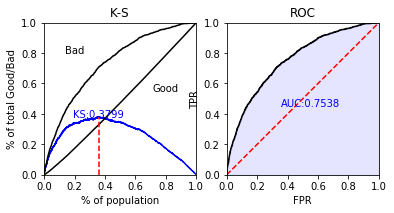

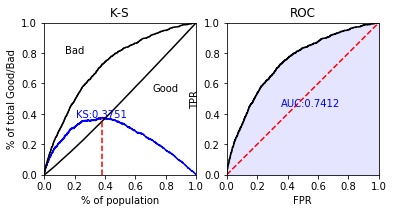

{'KS': 0.3751,
 'AUC': 0.7412,
 'Gini': 0.4824,
 'pic': <Figure size 432x288 with 2 Axes>}

In [26]:
pred_prob_train=logit_model_step_2.predict(train_woe)
pred_prob_test=logit_model_step_2.predict(test_woe)
sc.perf_eva(y_train,pred_prob_train) #训练
sc.perf_eva(y_test,pred_prob_test) #测试

## 6.制作评分卡

In [33]:
logit_model_step_2.coef_=np.array([logit_model_step_2.params.ravel()])
logit_model_step_2.intercept_=[logit_model_step_2.params[0]]

In [34]:
card=sc.scorecard(bins=finalbin,model=logit_model_step_2,xcolumns=logit_model_step_2.params.index.ravel(),
                  points0=600,odds0=1/19,basepoints_eq0=False)

In [35]:
pd.concat(card)

variable  \
basepoints      0         basepoints   
Score2          80            Score2   
                81            Score2   
                82            Score2   
                83            Score2   
                84            Score2   
                85            Score2   
                86            Score2   
                87            Score2   
Score3          207           Score3   
                208           Score3   
                209           Score3   
                210           Score3   
                211           Score3   
                212           Score3   
Score1          55            Score1   
                56            Score1   
                57            Score1   
                58            Score1   
                59            Score1   
                60            Score1   
IP_Var24        16          IP_Var24   
                17          IP_Var24   
                18          IP_Var24   
                19          IP_Var24   
Bureau_Var1033  98    Bureau_Var1033   
                99    Bureau_Var1033   
                100   Bureau_Var1033   
                101   Bureau_Var1033   
                102   Bureau_Var1033   
DAYS_EMPLOYED   10     DAYS_EMPLOYED   
                11     DAYS_EMPLOYED   
                12     DAYS_EMPLOYED   
                13     DAYS_EMPLOYED   
EDULEVEL        20          EDULEVEL   
                21          EDULEVEL   
Previous_Var545 213  Previous_Var545   
                214  Previous_Var545   
                215  Previous_Var545   
                216  Previous_Var545   
                217  Previous_Var545   
GENDER          0             GENDER   
                1             GENDER   
Bureau_Var5     194      Bureau_Var5   
                195      Bureau_Var5   
                196      Bureau_Var5   
                197      Bureau_Var5   

                                                                   bin  points  
basepoints      0                                                  NaN   565.0  
Score2          80                                             missing   -24.0  
                81                                          [-inf,0.2)   -61.0  
                82                                           [0.2,0.3)   -29.0  
                83                                           [0.3,0.4)   -25.0  
                84                                           [0.4,0.5)    -8.0  
                85                                           [0.5,0.6)    13.0  
                86                                           [0.6,0.7)    32.0  
                87                                           [0.7,inf)    58.0  
Score3          207                                            missing    -3.0  
                208                                         [-inf,0.2)   -52.0  
                209                                          [0.2,0.4)   -22.0  
                210                                          [0.4,0.5)     3.0  
                211                                          [0.5,0.7)    24.0  
                212                                          [0.7,inf)    44.0  
Score1          55                                             missing    -2.0  
                56                                          [-inf,0.3)   -28.0  
                57                                           [0.3,0.4)    -7.0  
                58                                           [0.4,0.6)    10.0  
                59                                           [0.6,0.7)    29.0  
                60                                           [0.7,inf)    44.0  
IP_Var24        16                                             missing     3.0  
                17                                          [-inf,1.0)    13.0  
                18                                           [1.0,3.0)    -8.0  
                19                                           [3.0,inf)   -36.0  
B

+ 输出评分

In [39]:
score_train=sc.scorecard_ply(X_train,card,only_total_score=False)
score_test=sc.scorecard_ply(X_test,card,only_total_score=False)

+ 评分表现

In [46]:
def ScorePerformance(train_pred,Y_train,bins):
    '''
    ScorePerformance
    '''

    Result=pd.DataFrame(
        {
            'ScoreBin':pd.cut(train_pred,bins,right=True),
            'Y':Y_train
        }
    ).groupby('ScoreBin')['Y'].agg(['count','sum']).rename(columns={'count':'Count','sum':'Bad'})

    ResultDis=Result.assign(
        CountDis=Result.Count/train_pred.size,
        BadRate=Result.Bad/Result.Count,
        GoodDis=(Result.Count-Result.Bad)/sum(Y_train==0),
        BadDis=Result.Bad/sum(Y_train==1),
    )

    ResultDisCum=ResultDis.assign(
        GoodDisCum=ResultDis.GoodDis.cumsum(),
        BadDisCum=ResultDis.BadDis.cumsum(),
        BinIV=(ResultDis.BadDis-ResultDis.GoodDis)*np.log((ResultDis.BadDis+1e-5)/(ResultDis.GoodDis+1e-5))
    )

    ResultDisKS=ResultDisCum.assign(
        IV=ResultDisCum.BinIV.sum(),
        WOE=np.log((ResultDisCum.BadDis+1e-5)/(ResultDisCum.GoodDis+1e-5)),
        KS=(ResultDisCum.GoodDisCum-ResultDisCum.BadDisCum).abs()
    ).reset_index()
    
    ResultDisKS=ResultDisKS.assign(
            ScoreBin=ResultDisKS.ScoreBin.astype('str')
            )

    return(ResultDisKS)

In [50]:
ScorePerformance(score_train.score,y_train,bins=10)

,ScoreBin,Count,Bad,CountDis,BadRate,GoodDis,BadDis,GoodDisCum,BadDisCum,BinIV,IV,WOE,KS
0,"(325.52, 374.0]",22,15,0.001095,0.681818,0.000378,0.009440,0.000378,0.009440,0.028928,0.923974,3.192358,9.061746e-03
1,"(374.0, 422.0]",186,77,0.009254,0.413978,0.005888,0.048458,0.006267,0.057898,0.089662,0.923974,2.106227,5.163150e-02
2,"(422.0, 470.0]",766,218,0.038109,0.284595,0.029604,0.137193,0.035871,0.195091,0.164957,0.923974,1.533215,1.592207e-01
3,"(470.0, 518.0]",2132,397,0.106070,0.186210,0.093728,0.249843,0.129599,0.444934,0.153050,0.923974,0.980367,3.153353e-01
4,"(518.0, 566.0]",3865,394,0.192289,0.101940,0.187510,0.247955,0.317109,0.692889,0.016888,0.923974,0.279400,3.757799e-01
5,"(566.0, 614.0]",5182,304,0.257811,0.058665,0.263519,0.191315,0.580628,0.884204,0.023119,0.923974,-0.320188,3.035762e-01
6,"(614.0, 662.0]",4735,137,0.235572,0.028933,0.248393,0.086218,0.829021,0.970422,0.171591,0.923974,-1.058060,1.414011e-01
7,"(662.0, 710.0]",2477,43,0.123234,0.017360,0.131489,0.027061,0.960510,0.997483,0.165053,0.923974,-1.580537,3.697273e-02
8,"(710.0, 758.0]",663,4,0.032985,0.006033,0.035600,0.002517,0.996110,1.000000,0.087521,0.923974,-2.645485,3.889579e-03
9,"(758.0, 806.0]",72,0,0.003582,0.000000,0.003890,0.000000,1.000000,1.000000,0.023205,0.923974,-5.966039,1.110223e-16


In [51]:
ScorePerformance(score_test.score,y_test,bins=10)

,ScoreBin,Count,Bad,CountDis,BadRate,GoodDis,BadDis,GoodDisCum,BadDisCum,BinIV,IV,WOE,KS
0,"(333.543, 379.7]",12,6,0.001212,0.500000,0.000658,0.007663,0.000658,0.007663,0.017098,0.74493,2.440987,7.004724e-03
1,"(379.7, 425.4]",89,34,0.008990,0.382022,0.006033,0.043423,0.006691,0.051086,0.073747,0.74493,1.972365,4.439477e-02
2,"(425.4, 471.1]",339,86,0.034242,0.253687,0.027750,0.109834,0.034441,0.160920,0.112902,0.74493,1.375452,1.264784e-01
3,"(471.1, 516.8]",1027,180,0.103737,0.175268,0.092903,0.229885,0.127345,0.390805,0.124099,0.74493,0.905955,2.634601e-01
4,"(516.8, 562.5]",1794,212,0.181212,0.118172,0.173522,0.270754,0.300867,0.661558,0.043257,0.74493,0.444884,3.606916e-01
5,"(562.5, 608.2]",2449,151,0.247374,0.061658,0.252057,0.192848,0.552923,0.854406,0.015852,0.74493,-0.267739,3.014830e-01
6,"(608.2, 653.9]",2246,74,0.226869,0.032947,0.238236,0.094508,0.791159,0.948914,0.132878,0.74493,-0.924511,1.577551e-01
7,"(653.9, 699.6]",1434,32,0.144848,0.022315,0.153779,0.040868,0.944938,0.989783,0.149603,0.74493,-1.324976,4.484486e-02
8,"(699.6, 745.3]",441,7,0.044545,0.015873,0.047603,0.008940,0.992541,0.998723,0.064624,0.74493,-1.671463,6.181455e-03
9,"(745.3, 791.0]",69,1,0.006970,0.014493,0.007459,0.001277,1.000000,1.000000,0.010869,0.74493,-1.758285,1.110223e-16
